<a href="https://colab.research.google.com/github/Geon27/4-1-Boston_housin/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1(1204%2C_%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston_housing Data를 활용한 집값 예측 Model

**MAE(Mean Absolute Error)**, 
**MSE(Mean Squared Error)**, 
**RMSE(Root Mean Squared Error)** 를 중심으로

- 나의 구글 드라이브와 구글 코랩의 연결  
- 이 과정(마운트)을 통해 나의 구글 드라이브내의 데이터를 구글 코랩에 로드하고 또한 분석된 내용을 저장하는것도 가능하게 됨

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# 아래 출력되는 URL에 접속하여 이용 동의 후 생성되는 인증코드를 복사해서 붙여넣기

Mounted at /content/drive


### 파이썬 패키지 설치

패키지라 함은 메인엔진은 파이썬이 잘 구현될 수 있도록 지원해주는 체계로서 패키지안에 함수나 클래스 등이 포함되어 있음  
패키지를 사용하려면 2단계(인스톨-로드)를 거치는데 로드는 매번 인스톨은 처음에 1회만 하면 되는데 구글 코랩에서는 단점으로서 클라우드 방식이므로 인스톨을 매번해주어야 하는 번거로움이 있음

#### 패키지 로드

아래 코드는 인스톨 코드이므로 후에 로드를 다시 해주어야 함  
코랩에서는 다른 파이썬 IDE와 다르게 이미 필요한 패키지들이 설치되어 있어서 비교적 편리함  
다만 어떤 패키지는 버전에 따라 상황이 달라질 수 있으므로 같은 패키지여도 필요한 버전을 추가로 설치해야 하는 경우도 발생될 수 있음

In [ ]:
# !pip uninstall scipy -y
# !pip uninstall pingouin -y
!pip install pingouin
# !pip install statsmodels==0.13.1
!pip install sidetable
# !pip install researchpy 
# !pip install bioinfokit
# !pip install sidetable


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 54.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=5e3d1313c9d86ae230e6db690fe78d229d52b28f4056e7686ca9da244a6f066a
  Stored in directory: /root/.cache/pip/wheels/75/b0/89/f6866fc5accea9bec04f4c9f2a242520d6e8e7b8fcf89e139c
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=a63f69701e2caca644ebc867867ace7594911034d9267431ba9c33984d7febb0
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple

패키지 인스톨 명령어 `"!pip install 패키지이름"`로 인스톨함

#### 패키지 로드

In [ ]:
import seaborn as sns
import pandas as pd
#import datatable as dt
import scipy.stats as ss
from sklearn import datasets
import numpy
import sidetable 
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.options.display.float_format = lambda x: f'{x:.3f}'
#pd.reset_option('display.float_format')

## 데이터로드

바로 아래의 R버전은 파이썬과 대칭되어 동일한 명령을 R에서 수행할때의 코드이므로 참고하기 바람

In [ ]:
# #R버전
# # 데이터 로드: 엑셀파일
# # file.choose()
# Dataset <- read.xlsx(“경로”, sheet = 1) # 파일명: 관광수요_데이터_예제_R업로드_환경부.xlsx

# # 데이터 로드 확인
# dim(Dataset)                       # 데이터의 가로세로수 확인
# head(Dataset)                      # 데이터 앞부분(6개)확인
# names(Dataset)                     # 데이터셋내의 변수명 확인
# datatable(Dataset)                  # html형태로 데이터 로드 상태 확인


나의 구글 드라이브에서 원하는 데이터 파일을 찾아서(drive-My drive) 이에 대한 경로를 복사하여 아래 코드의 `' '`부분에 붙여 넣기  
아래의 경로는 이전 사용자의 고유경로이므로 바로 실행하면 에러가 발생될 수 있음

In [ ]:
##데이터 로드: 엑셀파일
# 파일명: housing.csv
Df = pd.read_csv('/content/drive/MyDrive/보스턴_데이터과학/housing.csv')

In [ ]:
#Df[1:1] #변수명만 추출
Df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

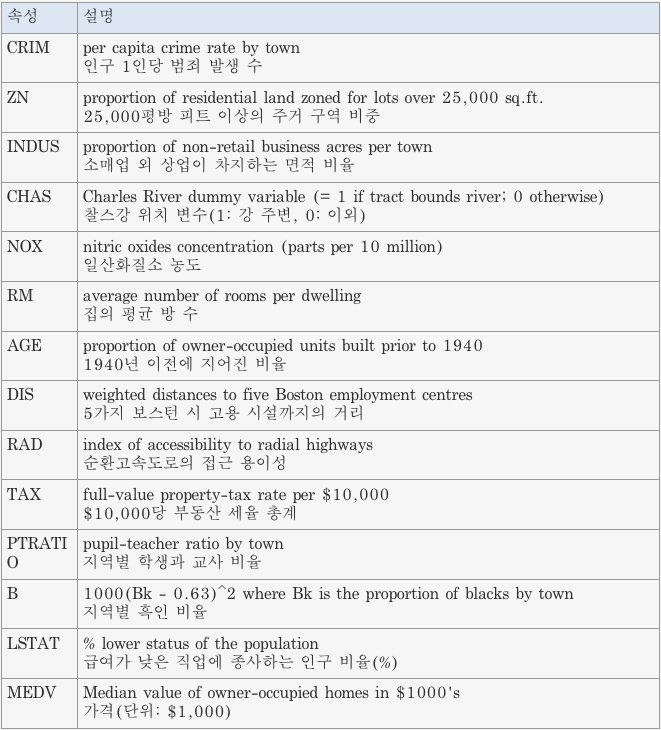

인덱싱이라고 해서 데이터의 일부분을 가져오고자 하는 경우 사용하는데 `:`을 기준으로 왼쪽이 행, 오른쪽이 열이 됨

In [ ]:
# 데이터 로드 확인
print(Df.shape)            # 데이터의 가로세로수 확인
print(Df.head())           # 데이터 앞부분(5개)확인
print(Df.tail())           # 데이터 뒷부분(5개)확인

(506, 14)
   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700  
3 394.630  2.940 33.400  
4 396.900  5.330 36.200  
     CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
501 0.063 0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045 0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061 0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110 0.000 11.930 0.000 0.573 6.79

In [ ]:
Df = pd.DataFrame(Df) # 데이터 한눈에 보기
Df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700


In [ ]:
Df['TAX'].value_counts()

666.000    132
307.000     40
403.000     30
437.000     15
304.000     14
          ... 
285.000      1
198.000      1
256.000      1
244.000      1
313.000      1
Name: TAX, Length: 66, dtype: int64

위 데이터셋에서는 python_score에 영향을 주는 요인들로 CRIM, AGE, RM, NOX, TAX등의 다양한 변수들이 있는 것을 알 수 있음. 영향을 주는 것을 독립변수(양적변수)라 하고 영향을 받는 것을 종속변수(질적변수)라고 하는데 현 데이터에서는 종속변수를 'MEDV', 나머지 변수들을 독립변수로 지정한다.

### 질적 target에 대한 탐색적 분석

In [ ]:
Df['MEDV'].value_counts()

50.000    16
25.000     8
22.000     7
21.700     7
23.100     7
          ..
32.900     1
34.600     1
30.300     1
33.300     1
8.100      1
Name: MEDV, Length: 229, dtype: int64

In [ ]:
import sidetable as stb
Df.stb.freq(['MEDV'])

,MEDV,count,percent,cumulative_count,cumulative_percent
0,50.000,16,3.162,16,3.162
1,25.000,8,1.581,24,4.743
2,23.100,7,1.383,31,6.126
3,22.000,7,1.383,38,7.510
4,21.700,7,1.383,45,8.893
...,...,...,...,...,...
224,8.100,1,0.198,502,99.209
225,7.500,1,0.198,503,99.407
226,7.400,1,0.198,504,99.605
227,6.300,1,0.198,505,99.802


###여러변수의 기술통계분석: 양적변수

In [ ]:
#양적변수들을 num_vars로 설정
num_vars = Df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

In [ ]:
#여러변수에 대한 평균
vars_mean = numpy.mean(num_vars) 
round(vars_mean,3) #소수점 3자리 반올림

CRIM        3.614
ZN         11.364
INDUS      11.137
NOX         0.555
RM          6.285
AGE        68.575
DIS         3.795
RAD         9.549
TAX       408.237
PTRATIO    18.456
B         356.674
LSTAT      12.653
dtype: float64

In [ ]:
# 중앙값
#target_vars.target_vars()
vars_median = numpy.median(num_vars, axis=0)
#vars_median = target_vars.apply(numpy.median(target_vars), axis=1)
vars_median
#round(vars_median,3) #소수점 3자리 반올림

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 5.38000e-01, 6.20850e+00,
       7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02, 1.90500e+01,
       3.91440e+02, 1.13600e+01])

In [ ]:
Df_sub = num_vars.describe()
Df_sub

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.602,23.322,6.860,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,0.257,0.000,9.690,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.677,12.500,18.100,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [ ]:
Df.info() #데이터정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 질적변수에 대한 탐색적 분석

In [ ]:
var_cate  = Df[["CHAS"]]
var_cate

,CHAS
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
501,0.000
502,0.000
503,0.000
504,0.000


In [ ]:
import sidetable as stb
for col in var_cate:
  print(var_cate.stb.freq([col]))

   CHAS  count  percent  cumulative_count  cumulative_percent
0 0.000    471   93.083               471              93.083
1 1.000     35    6.917               506             100.000


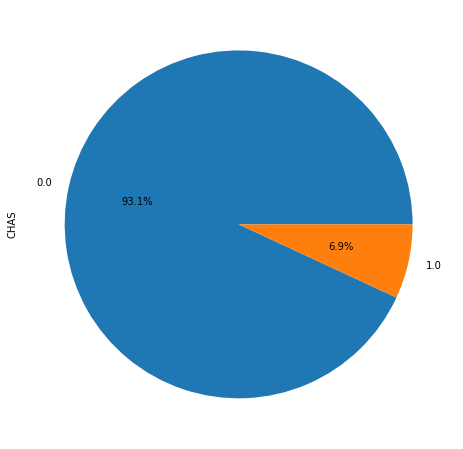

In [ ]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [12, 8]
# Pie chart
Df['CHAS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
#문자형식으로 코딩된 질적변수를 더미변수로 코딩
Df_dummy = pd.get_dummies(Df, drop_first=True) # 기준변수를 0으로 만들어줌
Df_dummy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [ ]:
Df_dummy.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
target = Df_dummy['MEDV']

In [ ]:
target

0     24.000
1     21.600
2     34.700
3     33.400
4     36.200
       ...  
501   22.400
502   20.600
503   23.900
504   22.000
505   11.900
Name: MEDV, Length: 506, dtype: float64

In [ ]:
features = Df_dummy.drop(['MEDV'], axis = 1) # 여러개의 열을 삭제할 때
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


In [ ]:
print(features)

     CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0   0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1   0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2   0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3   0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4   0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   
..    ...    ...    ...   ...   ...   ...    ...   ...   ...     ...      ...   
501 0.063  0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045  0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061  0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110  0.000 11.930 0.000 0.573 6.794 89.300 2.389 1.000 273.000   21.000   
505 0.047  0.000 11.930 0.000 0.573 6.030 80.800 2.505 1.000 273.000   21.000   

          B  LSTAT  
0   39

### 변수들의 표준화  
참고사이트: https://jimmy-ai.tistory.com/139

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [ ]:
scaler_standard.fit(features)
features_scaled=scaler_standard.transform(features)
print(features_scaled.shape)

(506, 13)


In [ ]:
print(features.head())
features_scaled

   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT  
0 396.900  4.980  
1 396.900  9.140  
2 392.830  4.030  
3 394.630  2.940  
4 396.900  5.330  


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

분석하는 feature들의 단위가 서로 다를 수 있으므로 단위를 표준화할 필요가 있는데 이를 표준화라고 함. 한편 표준화 방법에는 여러가지 있음. 여기서는 `StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춥니다.`를 사용함

### 회귀분석용

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(features_scaled, target, random_state=42)#, test_size=0.2, stratify=y
# 중요한 것은 42를 사용할 때마다 처음 분할 할 때 항상 동일한 출력을 얻는다
# stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다
# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
# test_size와 stratify는 필요한 옵션이지만 데이터가 적은 경우 에러가 발생될 수 있음

X_scaled과 y에 대해 train_test_split을 실행하면 총 4개의 데이터셋(features_scaled_train, features_scaled_test, target_train, target_test)을 생성한다.

In [ ]:
print(features_scaled_train[:6])
print(target_train[:6])

[[-0.40992396 -0.48772236 -1.2660231  -0.27259857 -0.57613394  1.23997392
   0.84012202 -0.52026428 -0.75292215 -1.27835435 -0.30309415  0.41057102
  -1.09799011]
 [-0.00913688 -0.48772236  1.2319449   3.66839786  2.73234648 -0.18895873
   0.49874053 -0.97428934 -0.52300145 -0.03110494 -1.73641788 -2.94572872
   0.33178248]
 [-0.41635358  0.370669   -1.13908197 -0.27259857 -0.96572262  2.18737194
  -0.14490582  0.42766932 -0.52300145 -1.14175084 -1.64394538  0.33590374
  -1.24657432]
 [-0.37544025 -0.48772236  2.11761463 -0.27259857  0.22723076 -0.95684976
   0.96102797 -0.96872752 -0.8678825  -1.30805076  0.29797709  0.02868241
   2.04750959]
 [-0.41269248 -0.48772236 -1.15221381 -0.27259857 -0.81800718  0.06890449
  -1.82692087  0.67481374 -0.6379618   0.1292557  -0.71922039  0.203235
  -0.74475218]
 [-0.26286427 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.30293142
   1.11749449  0.18061998 -0.6379618  -0.6012761   1.17646583  0.21990082
   0.05423839]]
182   37.900
155   15.6

In [ ]:
print(features_scaled_test[:6])
print(target_test[:6])

[[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
   0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914  0.42570183
  -0.50645674]
 [-0.41394931  1.22906036 -0.68968118  3.66839786 -0.93030547  0.67438443
  -1.26861989  0.13431903 -0.6379618  -0.91605809 -0.39556665  0.44105193
  -1.27881429]
 [-0.40821211 -0.48772236  2.42256516 -0.27259857  0.469104   -0.42972605
   1.0748218  -0.91600909 -0.6379618   1.79819419  0.76033959  0.36660394
   0.75931252]
 [-0.40985297 -0.48772236 -0.04768006 -0.27259857 -1.22400869 -0.31290404
  -2.16119024  0.70937307 -0.6379618  -0.61315466  0.34421334  0.37537543
  -0.99986846]
 [ 0.17184212 -0.48772236  1.01599907 -0.27259857  1.36749033  0.01761678
   0.8258978  -0.67827698  1.66124525  1.53092646  0.80657583  0.31156286
   0.64717349]
 [-0.40870204 -0.48772236  0.24705682 -0.27259857 -1.01668877 -0.00802708
   0.2106999   0.12224465 -0.52300145 -0.06080135  0.1130321   0.18624024
  -0.09574756]]
173   23.600
274   32

In [ ]:
print(features_scaled_train.shape)
print(target_train.shape)

(379, 13)
(379,)


In [ ]:
print(features_scaled_test.shape)
print(target_test.shape)

(127, 13)
(127,)


### 지도학습중 수치예측

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # 클수록 정확도가 높다는 의미
from sklearn.metrics import mean_squared_error # 작을수록 정확도가 높다는 의미

def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [ ]:
LR_reg = LinearRegression() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
LR_reg.fit(features_scaled_train, target_train)

LinearRegression()

In [ ]:
LR_reg.pred_test = LR_reg.predict(features_scaled_test)


MAPE_LR_reg_test=MAPE(target_test, LR_reg.pred_test)
print(MAPE_LR_reg_test)

16.199174591632605


In [ ]:
LR_reg.pred_train = LR_reg.predict(features_scaled_train)

MAPE_LR_reg_train=MAPE(target_train, LR_reg.pred_train)
print(MAPE_LR_reg_train)

16.70388020068276


####  K-최근접법: 예측, https://hleecaster.com/ml-knn-regression-example/

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KN_reg = KNeighborsRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"

In [ ]:
KN_reg.fit(features_scaled_train, target_train)
KN_reg.score(features_scaled_train, target_train) # 분류된 모델의 정확도를 측정

0.8495556978626857

In [ ]:
#k최근접법으로 변수들을 통해 target의 위치 예측
KN_reg.predict([[0.7842, 0, 8.14, 0, 0.538, 5.99, 81.7, 4.2579, 4, 307, 21, 386.75, 14.67]]) # 주어진 포인트에 대한 실제 예측값 도출

array([13.7])

모델개발은 train set으로 했는데 test set에도 잘 적용되는지를 살펴보려면...

수치예측의 다양한 모델적합도 기준에서 MAPE를 권장함
https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432

In [ ]:
KN_reg.pred_test = KN_reg.predict(features_scaled_test)

In [ ]:
MAPE_KN_reg_test=MAPE(target_test, KN_reg.pred_test)
print(MAPE_KN_reg_test)

12.119806744180075


In [ ]:
KN_reg.pred_train = KN_reg.predict(features_scaled_train)

In [ ]:
KN_reg.pred_train = KN_reg.predict(features_scaled_train)

MAPE_KN_reg_train=MAPE(target_train, KN_reg.pred_train)
print(MAPE_KN_reg_train)

10.87778697486949


#### decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_reg = DecisionTreeRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
DT_reg.fit(features_scaled_train, target_train)

DecisionTreeRegressor()

In [ ]:
DT_reg.pred_test = DT_reg.predict(features_scaled_test)
print(DT_reg.pred_test)
MAPE_DT_reg_test=MAPE(target_test, DT_reg.pred_test)
print(MAPE_DT_reg_test)

[18.5 32.  15.2 23.7 19.1 20.5 19.3 17.8 21.6 21.2 19.5 19.5  8.5 20.5
 16.2 25.  20.5  7.2 50.  16.7 22.6 22.6 15.6 22.8 13.1 14.9 24.5 13.5
 17.8 24.5 19.5 23.3 50.  21.9 13.5 15.6 33.  19.  21.7 24.7 19.8 28.4
 50.  16.2 22.9 13.1 15.6 23.7 19.1 32.5 22.9 36.1 19.4 28.4 44.8 22.2
 13.1 22.8 19.8 23.1 24.5 33.4 29.4 18.4 28.  14.3 15.4 23.2 22.8 19.
 21.7 28.7  8.4 22.9 26.4  5.6 20.4 44.  13.1  8.1 22.  10.2 18.7  7.2
 20.3 30.1 14.1 23.1 23.2 18.  22.6  8.5 19.2 18.5 24.3 18.2 50.  16.3
 13.5 16.3 17.5 26.4 10.2 20.4 18.7 19.  19.6 23.  20.6 24.1  7.2 16.3
 23.2 29.6 29.6 14.6 50.  14.8 19.3 22.3 16.2 23.7  8.5 21.2 23.7 23.1
 24.4]
14.827420662971717


In [ ]:
DT_reg.pred_train = DT_reg.predict(features_scaled_train)

MAPE_DT_reg_train=MAPE(target_train, DT_reg.pred_train)
print(MAPE_DT_reg_train)

0.0


#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF_reg = RandomForestRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
RF_reg.fit(features_scaled_train, target_train)

RandomForestRegressor()

In [ ]:
#RF_reg.pred_test.fit(features_scaled_test.reshape(-1, 1), target_test)

In [ ]:
RF_reg.pred_test = RF_reg.predict(features_scaled_test)
print(RF_reg.pred_test)

MAPE_RF_reg_test=MAPE(target_test, RF_reg.pred_test)
print(MAPE_RF_reg_test)

[22.824 31.264 16.939 23.935 17.175 21.145 19.582 15.728 21.246 20.91
 20.272 19.776  8.153 21.466 19.005 25.385 19.593  8.135 45.993 15.028
 24.084 23.541 14.709 23.779 14.707 14.85  21.55  13.787 19.041 20.8
 19.925 23.177 32.323 20.311 14.653 16.048 34.954 19.379 20.924 23.959
 19.779 29.572 45.558 19.602 22.597 13.943 15.3   24.141 18.504 28.499
 21.788 33.677 17.118 26.316 45.966 22.315 15.903 32.568 22.257 20.888
 25.289 33.727 29.101 18.52  27.244 16.459 13.382 22.958 29.179 16.572
 20.432 28.732 10.337 21.538 21.984  6.904 20.106 46.033 11.312 12.891
 21.604 11.388 19.845  9.024 20.894 26.544 15.544 23.44  23.795 17.534
 22.035  7.974 19.209 18.796 23.389 19.579 40.831 11.437 12.892 11.709
 20.259 23.543 13.316 20.167 21.474 12.661 18.883 24.692 20.397 23.453
  8.838 14.862 22.753 24.395 31.771 14.186 42.189 16.333 19.635 23.777
 19.418 24.11   7.816 21.029 24.685 22.022 24.197]
11.355026203466778


In [ ]:
RF_reg.pred_train = RF_reg.predict(features_scaled_train)

MAPE_RF_reg_train=MAPE(target_train, DT_reg.pred_train)
print(MAPE_RF_reg_train)

0.0


In [ ]:
MAPE_DT_reg_test=MAPE(target_test, RF_reg.pred_test)
print(MAPE_RF_reg_test)

11.355026203466778


#### 정확도 분석결과 summary

In [ ]:
reg_models_train = [('Linear regression', MAPE_LR_reg_train),
                    ('KNeighbors', MAPE_KN_reg_train),
                    ('Decision tree', MAPE_DT_reg_train),
                    ('Random Forest', MAPE_RF_reg_train)]
reg_models_test = [('Linear regression', MAPE_LR_reg_test),
                   ('KNeighbors', MAPE_KN_reg_test),
                   ('Decision tree', MAPE_DT_reg_test),
                   ('Random Forest', MAPE_RF_reg_test)]

In [ ]:
reg_train_summary = pd.DataFrame(data = reg_models_train, columns=['Model', 'f1-score'])
reg_train_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

,Model,f1-score
0,Linear regression,16.704
1,KNeighbors,10.878
2,Decision tree,0.000
3,Random Forest,0.000


In [ ]:
reg_test_summary = pd.DataFrame(data = reg_models_test, columns=['Model', 'f1-score'])
reg_test_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

,Model,f1-score
0,Linear regression,16.199
1,KNeighbors,12.120
2,Decision tree,11.355
3,Random Forest,11.355


Boston 데이터의 경우 f1-Score로 표현하는것 보다는 MAE, MSE, RMSE로 표현하는것이 적합함

위의 4가지 Model(Linear regression, KNeighbors, Decision tree	, Random Forest	)중 Linear regression의 결과값이 가장 좋으므로, Linear regression을 활용하여 좀 더 나은 모델을 만들어 본다.

### 구분	설명
MAE(Mean Absolute Error)	실제값과 예측값의 차이, 잔차의 절대값을 평균한 값

MSE(Mean Squared Error)	실제값과 예측값의 차이
잔차의 제곱을 평균한 값

RMSE(Root Mean Squared Error)	MSE의 제곱근


### Linear regression 심화
참고사이트: https://liz09045.tistory.com/95, https://velog.io/@wltn39/%EB%B3%B4%EC%8A%A4%ED%84%B4-%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1
 - 싸이킷런의 선형회귀분석을 이용
 - 사용된 데이터는 위의 보스턴 데이터와 동일
 - features(x축)에는 'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'를, Target(y축)에는'MEDV'가 적용됨.

**MSE 표현**

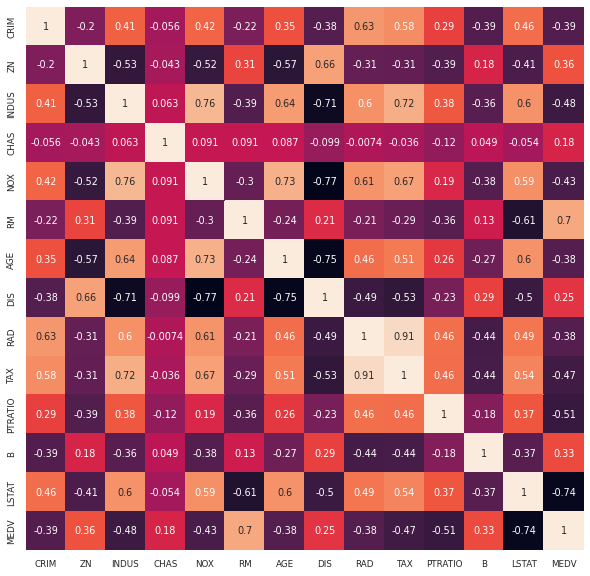

In [ ]:
#상관관계 행렬
Df_corr=Df.corr()
#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(Df_corr, annot=True, cbar=False)
plt.show()

In [ ]:
# Target 변수와 상관관계가 높은 순으로 출력
corr_order=Df.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending=False)
corr_order

LSTAT     0.738
RM        0.695
PTRATIO   0.508
INDUS     0.484
TAX       0.469
NOX       0.427
CRIM      0.388
RAD       0.382
AGE       0.377
ZN        0.360
B         0.333
DIS       0.250
CHAS      0.175
Name: MEDV, dtype: float64

In [ ]:
#시각화로 분석할 피처 선택 추출
plot_cols=['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_Df=Df.loc[:, plot_cols]
plot_Df.head()

,MEDV,LSTAT,RM,PTRATIO,INDUS
0,24.000,4.980,6.575,15.300,2.310
1,21.600,9.140,6.421,17.800,7.070
2,34.700,4.030,7.185,17.800,7.070
3,33.400,2.940,6.998,18.700,2.180
4,36.200,5.330,7.147,18.700,2.180


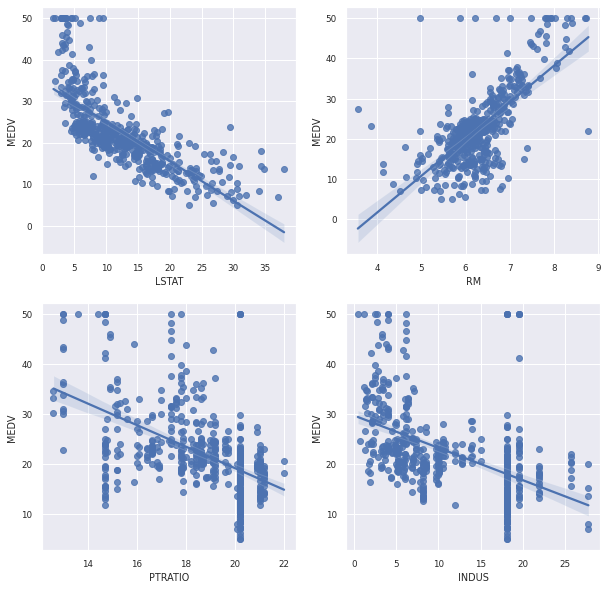

In [ ]:
#regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1=plt.subplot(2, 2, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_Df, ax=ax1)
plt.show()

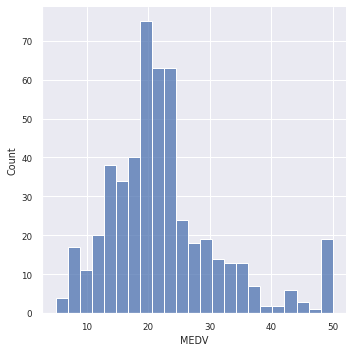

In [ ]:
#Target 데이터 분포
sns.displot(x='MEDV', kind='hist', data=Df)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

Df_scaled=Df.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
scaler.fit(Df_scaled)
Df_scaled=scaler.transform(Df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
Df.iloc[:, :-1]=Df_scaled[:, :]
Df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000,0.180,0.068,0.000,0.315,0.578,0.642,0.269,0.000,0.208,0.287,1.000,0.090,24.000
1,0.000,0.000,0.242,0.000,0.173,0.548,0.783,0.349,0.043,0.105,0.553,1.000,0.204,21.600
2,0.000,0.000,0.242,0.000,0.173,0.694,0.599,0.349,0.043,0.105,0.553,0.990,0.063,34.700
3,0.000,0.000,0.063,0.000,0.150,0.659,0.442,0.449,0.087,0.067,0.649,0.994,0.033,33.400
4,0.001,0.000,0.063,0.000,0.150,0.687,0.528,0.449,0.087,0.067,0.649,1.000,0.099,36.200


In [ ]:
#학습데이터와 테스트데이터 분할
from sklearn.model_selection import train_test_split
x_data=Df.loc[:, ['LSTAT', 'RM']]
y_data=Df.loc[:, 'MEDV']
x_train, x_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [ ]:
#선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-23.2  25.4]
상수항(절편): 16.3


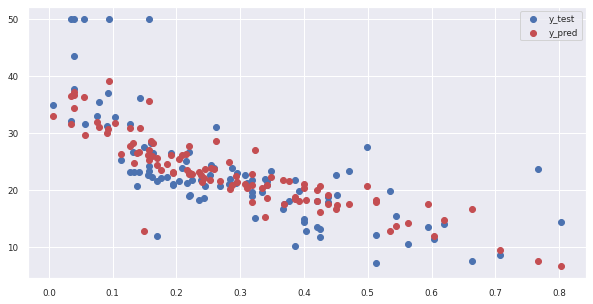

In [ ]:
#예측값 저장
y_test_pred=lr.predict(x_test)

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.scatter(x_test['LSTAT'], y_test, label='y_test')  #파란점, 실제값
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

In [ ]:
#성능 평가
from sklearn.metrics import mean_squared_error
y_train_pred=lr.predict(x_train)

train_mse=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MSE:%.4f" % train_mse)

test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:30.8042
Test MSE:29.5065


Train과 Test의 MSE값이 각각 30.8042, 29.5065로 나온다 

**RMSE의 표현**


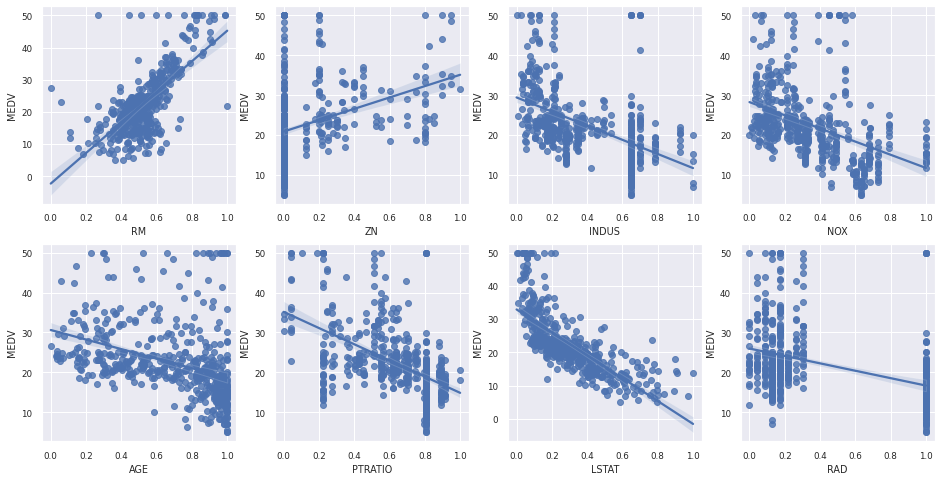

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y=target, data=Df , ax=axs[row][col])

506개의 데이터를 7:3 비율로 Target/Test로 분류
  
  train : 학습 -> linear regression 학습/모델링 수행 -> 모델(W) 생성
  
  test : 평가(validation)-> 평가지표 (MSE, RMSE, ... )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = Df[['MEDV']]
X_data = Df.drop(['MEDV'], axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


Variance score는 회귀모델이 Data를 얼마나 잘 표현했는가를 설명하는 Score이다.

In [ ]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: [28.49818847]
회귀 계수값: [[-10.1   6.6   0.9   3.   -9.6  17.5   0.6 -19.2   8.2  -7.5  -8.6   4.1
  -20.5]]


In [ ]:
# # 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
# coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
# coeff.sort_values(ascending=False)

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = Df[['MEDV']]
X_data = Df.drop(['MEDV'], axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
